In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

### MITBIH Data

In [9]:
mitbih_train = pd.read_csv('../data/raw/mitbih_train.csv').to_numpy()
mitbih_test = pd.read_csv('../data/raw/mitbih_test.csv').to_numpy()

In [13]:
mitbih_train.shape, mitbih_test.shape

((87553, 188), (21891, 188))

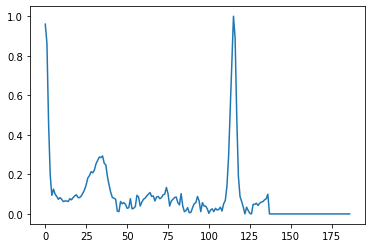

In [20]:
plt.plot(mitbih_train[0,:-1])

array([82.77272052,  2.5390335 ,  6.61085285,  0.73212797,  7.34526515])

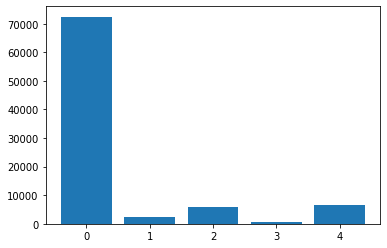

In [38]:
classes, counts = np.unique(mitbih_train[:,-1], return_counts=True)
plt.bar(classes, counts)
counts/np.sum(counts) * 100

array([82.76003837,  2.53985656,  6.61459047,  0.74003015,  7.34548445])

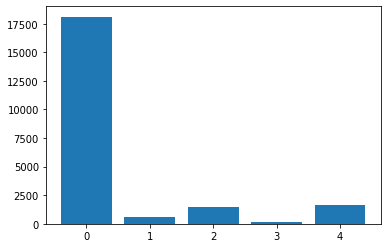

In [39]:
classes, counts = np.unique(mitbih_test[:,-1], return_counts=True)
plt.bar(classes, counts)
counts/np.sum(counts) * 100

### PTBDB Data

In [29]:
abnormal = pd.read_csv('../data/raw/ptbdb_abnormal.csv').to_numpy()
normal = pd.read_csv('../data/raw/ptbdb_normal.csv').to_numpy()

In [30]:
normal.shape, abnormal.shape

((4045, 188), (10505, 188))

In [40]:
counts = [len(normal), len(abnormal)]
counts/np.sum(counts) * 100

array([27.80068729, 72.19931271])

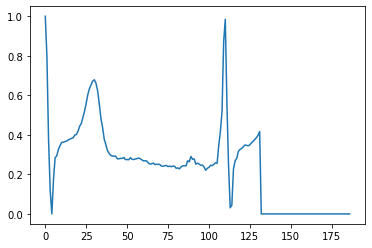

In [31]:
plt.plot(normal[0,:-1])

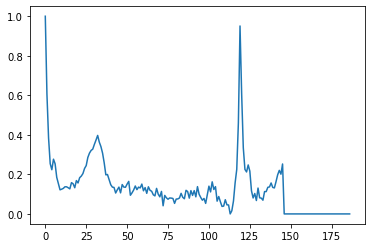

In [32]:
plt.plot(abnormal[0,:-1])

### Visualizations

In [63]:
idx = np.random.choice(mitbih_train.shape[0], 1000, replace=False)
X = PCA(n_components=50).fit_transform(mitbih_train[idx, :-1])
X_embedded = TSNE(n_components=2).fit_transform(X)

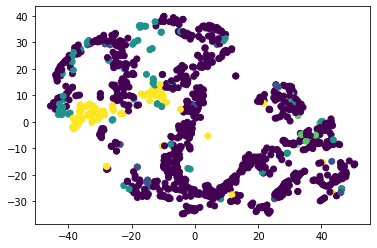

In [64]:
plt.scatter(X_embedded[:,0],X_embedded[:,1],c=mitbih_train[idx,-1])

In [71]:
X = PCA(n_components=50).fit_transform(np.vstack([normal[:500,:-1], abnormal[:500,:-1]]))
X_embedded = TSNE(n_components=2).fit_transform(X)

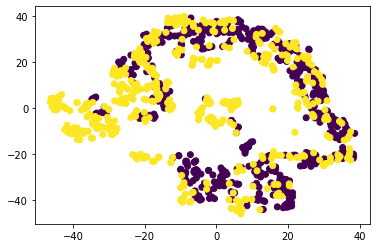

In [73]:
plt.scatter(X_embedded[:,0],X_embedded[:,1], c = np.hstack([np.zeros(500), np.ones(500)]))